In [1]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import QuarkTM
import pickle
import matplotlib

In [2]:
from syntax_sugar import pipe, END
from syntax_sugar import thread_syntax as t, process_syntax as p

NTHR = 14

In [3]:
0.05 / 0.15**2

2.2222222222222223

In [4]:
mQ = 0.5
mG = 1.6

In [5]:
%matplotlib inline

In [6]:
mode = 'LO'

In [7]:
if mode == 'HI':
    erange = linspace(-5, 5, 201)
    qrange = linspace(0, 5, 51)    
elif mode == 'LO':
    erange = linspace(-5, 5, 101)
    qrange = linspace(0, 5, 21)
else:
    raise ValueError

eps = 0.05
quark_run = Particle(mQ, qrange, erange, eps=eps)
gluon_run = Particle(mG, qrange, erange, eps=eps, stat='b', d=16, propagator=1)
# gluon_run1 = Particle(mG, qrange, erange, eps=eps, stat='b', d=16, propagator=1)

In [8]:
import os

In [9]:
Trange = arange(0.2, 0.5, 0.05)[::1]

In [10]:
quark_run.d

6

In [11]:
Trange

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])

In [12]:
colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])*10

In [13]:
Trange = [0.2, 0.3, 0.4, 0.5]

In [14]:
G = 6

In [15]:
matplotlib.rcParams['figure.raise_window'] = False

In [16]:
plot_progress = True

In [33]:
%matplotlib qt
for T in Trange[:]:
    params = {'G' : G, 'L' : .5, 'screen' : .06}
    params1 = {'G' : G, 'L' : .5, 'screen' : .06}

    lmax = 1
    out_folder = './output/TestL%i'%lmax +mode+'_G=%.2fL=%.3fMG=%.2fscreen=%.3f/'%(params['G'], params['L'], mG, params['screen'])
    
    if not os.path.exists(out_folder):
        os.mkdir(out_folder)
        
    params_rep = params.copy()
    params_rep['G'] = -params_rep['G']

    params_rep1 = params1.copy()
    params_rep1['G'] = -params_rep1['G']
    print('Running G = ', G, 'T = ', T)
    
    chss = []
    pts = []

    IMAGss = []
    REALss = []

    delta = 1
    
    Nf = 3

    if plot_progress:
        print('PLOTTING PROGRESS')
        fig, ax = plt.subplots(2, 4, figsize=(16, 9))
#     ax = _ax.flatten()
    n_iter = 0
    
    while abs(delta) > 1e-4:
    #     ch_QQ = Channel(quark_run, quark_run, T, G=G, ds=4, da=1)
    #     ch_GG = Channel(gluon_run, gluon_run, T, G=G, ds=9, da=1, Fa=9/4)
    #     ch_QG = Channel(quark_run, gluon_run, T, G=G, ds=6, da=3, Fa=9/8)
    #     ch_GQ = Channel(gluon_run, quark_run, T, G=G, ds=6, da=3, Fa=9/8)

    #     channels_Q = [ch_QQ, ch_QG]
    #     channels_G = [ch_GG, ch_GQ]

        channels_QQ = QuarkTM.ChannelGroup()
        channels_QG = QuarkTM.ChannelGroup()

        pss = [params, params1]
        pss_rep = [params_rep, params_rep1]

        
        channels_QQ.addChannel(
            QuarkTM.ChannelL('qq3', lmax, quark_run, quark_run, T, pss, ds=4, da=3, Fa=1/2, )
        )

        channels_QQ.addChannel(
            QuarkTM.ChannelL('qa1', lmax, quark_run, quark_run, T, pss, ds=4, da=1, Fa=1, )
        )

        channels_QQ.addChannel(
            QuarkTM.ChannelL('qq6', lmax, quark_run, quark_run, T, pss_rep, ds=4, da=6, Fa=1/4, )
        )

        channels_QQ.addChannel(
            QuarkTM.ChannelL('qa8', lmax, quark_run, quark_run, T, pss_rep, ds=4, da=8, Fa=1/8, )
        )

        # channels_QQ['qa1'] = Channel(quark_run, quark_run, T, ds=4, da=1, Fa=1, **params)

        
        # channels_QQ['qq3'] = Channel(quark_run, quark_run, T, ds=4, da=3, Fa=1/2, **params)
        # channels_QQ['qq6'] = Channel(quark_run, quark_run, T, ds=4, da=6, Fa=1/4, **params_rep)
        # channels_QQ['qa1'] = Channel(quark_run, quark_run, T, ds=4, da=1, Fa=1, **params)
        # channels_QQ['qa8'] = Channel(quark_run, quark_run, T, ds=4, da=8, Fa=1/8, **params_rep)

        channels_QG.addChannel(
            QuarkTM.ChannelL('qg3', lmax, quark_run, gluon_run, T, pss, ds=4, da=3, Fa=9./8, )
        )

        channels_QG.addChannel(
            QuarkTM.ChannelL('qg6', lmax, quark_run, gluon_run, T, pss, ds=4, da=6, Fa=3./8, )
        )

        channels_QG.addChannel(
            QuarkTM.ChannelL('qg15', lmax, quark_run, gluon_run, T, pss_rep, ds=4, da=15, Fa=3./8, )
        )
        
        # channels_QG['qg3'] = Channel(quark_run, gluon_run, T, ds=4, da=3, Fa=9/8, **params)
        # channels_QG['qg6'] = Channel(quark_run, gluon_run, T, ds=4, da=6, Fa=3/8, **params)
        # channels_QG['qg15'] = Channel(quark_run, gluon_run, T, ds=4, da=15, Fa=3/8, **params_rep)

        # channels_Q = {k : v for k, v in list(channels_QQ.items()) + list(channels_QG.items())}
        
        channels_GQ = QuarkTM.ChannelGroup()
        channels_GG = QuarkTM.ChannelGroup()
# 
        channels_GQ.addChannel(
            QuarkTM.ChannelL('gq3', lmax, gluon_run, quark_run, T, pss, ds=4, da=3, Fa=9/8)
        )

        channels_GQ.addChannel(
            QuarkTM.ChannelL('gq6', lmax, gluon_run, quark_run, T, pss, ds=4, da=6, Fa=3/8)
        )

        channels_GQ.addChannel(
            QuarkTM.ChannelL('gq15', lmax, gluon_run, quark_run, T, pss, ds=4, da=15, Fa=3/8)
        )
        # channels_GQ['gq3'] = Channel(gluon_run, quark_run, T, ds=4, da=3, Fa=9/8, **params)
        # channels_GQ['gq6'] = Channel(gluon_run, quark_run, T, ds=4, da=6, Fa=3/8, **params)
        # channels_GQ['gq15'] = Channel(gluon_run, quark_run, T, ds=4, da=15, Fa=3/8, **params)
        
        # channels_GQ.addChannel(
        #     QuarkTM.ChannelL('gq3', lmax, gluon_run, quark_run, T, pss, ds=4, da=3, Fa=9./8, )
        # )

        channels_GG.addChannel(
            QuarkTM.ChannelL('gg1', lmax, gluon_run, gluon_run, T, pss, ds=4, da=1, Fa=9/4)
        )

        channels_GG.addChannel(
            QuarkTM.ChannelL('gg16', lmax, gluon_run, gluon_run, T, pss, ds=4, da=16, Fa=9/8)
        )

        channels_GG.addChannel(
            QuarkTM.ChannelL('gg27', lmax, gluon_run, gluon_run, T, pss_rep, ds=4, da=27, Fa=3/4)
        )
        # channels_GG['gg1'] = Channel(gluon_run, gluon_run, T, ds=4, da=1, Fa=9/4, **params)
        # channels_GG['gg16'] = Channel(gluon_run, gluon_run, T, ds=4, da=16, Fa=9/8, **params)
        # channels_GG['gg27'] = Channel(gluon_run, gluon_run, T, ds=4, da=27, Fa=3/4, **params_rep)

        # channels_G = {k : v for k, v in list(channels_GQ.items()) + list(channels_GG.items())}
        
        # channels = {k : c for k, c in list(channels_G.items()) + list(channels_Q.items())}
        
        for k, ch_l in (list(channels_QQ.channels.items()) + list(channels_QG.channels.items()) 
                    + list(channels_GQ.channels.items()) + list(channels_GG.channels.items())):
            

            for l in range(lmax + 1):
                ch = ch_l.chs[l]
                np.savetxt(out_folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, ch.T), ch.v(ch.qrange))
            np.savetxt(out_folder + f'{k}_weights', array([ch.ds, ch.da, ch.Fa]))

        # break

        for chg in [channels_QQ, channels_QG, channels_GQ, channels_GG]:
            TM = chg.get_T()
            
        # break 
        
        if plot_progress:
            ch = channels_QQ['qa1'].chs[0]
            
            ax[0][0].clear()
            ax[0][0].plot(erange, imag(ch.TM[:, 0]), label='iter %i'%n_iter, c=colors[n_iter])
            ax[0][0].plot(erange, real(ch.TM[:, 0]), label='iter %i'%n_iter, c=colors[n_iter], ls='--')
    
            ax[0][0].plot(erange, imag(ch.TM[:, 5]), label='iter %i'%n_iter, c=colors[n_iter])
            
            ax[0][0].set_xlim(0, 2)
            ax[0][0].legend()
    
            ch = channels_GG['gg1'].chs[0]
            
            ax[1][0].clear()
    
            ax[1][0].plot(erange, imag(ch.TM[:, 0]), label='iter %i'%n_iter,  c=colors[n_iter])
            ax[1][0].plot(erange, real(ch.TM[:, 0]), label='iter %i'%n_iter, c=colors[n_iter], ls='--')
    
            ax[1][0].set_xlim(-4, 4)
    #                 ax[3].legend()
    
            ch = channels_QG['qg3'].chs[0]
    
            
            ax[0][3].clear()
    
            ax[0][3].plot(erange, imag(ch.TM[:, 0]), label='iter %i'%n_iter, c=colors[n_iter])
            ax[0][3].plot(erange, real(ch.TM[:, 0]), label='iter %i'%n_iter, c=colors[n_iter], ls='--')
    
            ax[0][3].set_xlim(0, 4)
            ax[0][3].legend()
            ch = channels_GQ['gq3'].chs[0]
    
            ax[1][3].clear()
    
            ax[1][3].plot(erange, imag(ch.TM[:, 0]), label='iter %i'%n_iter,  c=colors[n_iter])
            ax[1][3].plot(erange, real(ch.TM[:, 0]), label='iter %i'%n_iter, c=colors[n_iter], ls='--')
    
            ax[1][3].set_xlim(0, 4)
                    
            plt.pause(0.1)

        IMAGs = dict()
        REALs = dict()
        keys = ['QQ', 'QG', 'GQ', 'GG']
        funcs = [tm.sigma_ff_onshell, tm.sigma_fb_onshell, tm.sigma_bf_onshell, tm.sigma_bb_onshell]

        for key, func, channels in zip(keys, funcs, [channels_QQ, channels_QG, channels_GQ, channels_GG]):
            TM_tot = channels.get_T()

            # break
            
            # plt.plot(erange, imag(TM_tot[:, 0]))
            ch = list(channels.channels.items())[0][1] #ch = list(channels.items())[0][1] # take any of the channels since SFs are the same
            iImTM_tot = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(TM_tot)))
            eps1 = tm.Interpolator(qrange, ch.p_i.om0(qrange), 'linear')
            eps2 = tm.Interpolator(qrange, ch.p_j.om0(qrange), 'linear')
            ress = []
            for q in tqdm.tqdm(qrange):
            
                res = pipe(erange) | p[lambda z: func(z, q, ch.T, iImTM_tot, 
                                                                ch.p_j.R, eps1, eps2)]*(NTHR//1) | END
                ress += [res]

            ress = array(ress).transpose()
            IMAGs[key] = ress

            ReSigmas = []

            for res in ress.transpose():
                iImSigma = tm.Interpolator(ch.erange, np.ascontiguousarray(res), 'cubic')
                ReSigma = [tm.ReSigmaKK(e, iImSigma) for e in ch.erange]
                ReSigmas += [ReSigma]

            REALs[key] = np.array(ReSigmas).transpose()

            # ch.ReS = np.array(ReSigmas).transpose()
            

        IMAGss += [IMAGs]
        REALss += [REALs]
        
        ImS_Q = IMAGs['QQ'] + IMAGs['QG']
        ReS_Q = REALs['QQ'] + REALs['QG']

        if plot_progress:
            ax[0][1].plot(erange, ImS_Q[:, 0], c=colors[n_iter])
            ax[0][1].set_xlim(-1, 3)
        
        om0_k = np.array([quark_run.om0(quark_run.qrange) for e in quark_run.erange])
        arrE = np.array([quark_run.erange for q in quark_run.qrange]).transpose()

        G_Q_new = 1/(arrE - om0_k + 0*1j*quark_run.eps - (ReS_Q + 1j*ImS_Q))

    #     quark_new = Particle(quark_run.m, qrange, erange, eps=2e-2, R=-2*imag(G_Q_new))
        quark_new = Particle(quark_run.m, qrange, erange, eps=quark_run.eps, Gtab=G_Q_new)
        
        quark_new.S = ReS_Q + 1j*ImS_Q
        
        # ImS_G = sum([c.Nf * c.ds * c.da *c.ImS / c.p_i.d for c in channels_G.values()],
        #        axis=0)
        
        # ReS_G = sum([c.Nf * c.ds * c.da *c.ReS / c.p_i.d for c in channels_G.values()],
        #        axis=0)

        ImS_G = IMAGs['GG'] + IMAGs['GQ']
        ReS_G = REALs['GG'] + REALs['GQ']

        if plot_progress:
            ax[1][1].plot(erange, ImS_G[:, 0])
            ax[1][1].set_xlim(-0, 3)
        
        om0_k = np.array([gluon_run.om0(gluon_run.qrange) for e in gluon_run.erange])
        arrE = np.array([gluon_run.erange for q in gluon_run.qrange]).transpose()

    #     G_G_new = 1/(arrE**2 - om0_k**2 + 2*1j*gluon_run.eps*arrE - (ReS_G + 1j*ImS_G))
        G_G_new = 1/(arrE - om0_k + 0*1j*gluon_run.eps - (ReS_G + 1j*ImS_G))
    #     gluon_new = Particle(gluon_run.m, qrange, erange, eps=2e-2, stat='b', d=16, R=-2*imag(G_G_new))
        gluon_new = Particle(gluon_run.m, qrange, erange, eps=gluon_run.eps, stat='b', d=16, Gtab=G_G_new)
        
        gluon_new.S = ReS_G + 1j*ImS_G
        
        chss += [[channels_QQ, channels_QG, channels_GQ, channels_GG]]
        pts += [[quark_run, gluon_run]]

        delta = 0
        delta += sqrt(sum((quark_new.Rtab - quark_run.Rtab)**2)) / len(erange) / len(qrange)
#         delta += sum(quark_new.Rtab / quark_run.Rtab) / len(erange) / len(qrange)
        delta += sqrt(sum((gluon_new.Rtab - gluon_run.Rtab)**2)) / len(erange) / len(qrange)
        delta /= 2
        print(delta)
    
        quark_bup = quark_run

        quark_run = quark_new
        gluon_run = gluon_new

        if plot_progress:
            ax[0][2].plot(erange, quark_new.Rtab[:, 0], c=colors[n_iter])
            ax[1][2].plot(erange, gluon_new.Rtab[:, 0], c=colors[n_iter])
            ax[0][2].set_xlim(-1, 3)
            ax[1][2].set_xlim(0, 3)
            plt.pause(0.1)

        sumQ = trapz(quark_new.Rtab[:, 0], x=erange)
        sumG = trapz(gluon_new.Rtab[:, 0], x=erange)
        print('sum Q = ', sumQ)
        print('sum G = ', sumG)

        if any([abs(sumQ - 1) > 1e-1, abs(sumG - 1) > 1e-1]):
            raise ValueError('Sum rule not fulfilled, STOP')
        n_iter += 1

        # break
    # cQ, cG = chss[-1]

    IMAGs = IMAGss[-1]
    REALs = REALss[-1]

    #### Dirty saving

    kk = ['Q', 'Q', 'G', 'G']
    for _k, gr in zip(kk, [channels_QQ, channels_QG, channels_GQ, channels_GG]):
        for k, chl in gr.channels.items():
            for l in range(chl.lmax + 1):
                c = chl.chs[l]
                np.savetxt(out_folder + _k + '_TM_'+k+'_l=%i'%l + '_T=%.3f.dat'%T, c.TM)
                np.savetxt(out_folder + _k + '_X_'+k+'_l=%i'%l + '_T=%.3f.dat'%T, c.XS[0])

    ####
    
    # for k, c in cQ.items():
    #     np.savetxt(out_folder + 'Q_TM_'+k+'_T=%.3f.dat'%T, c.TM)
    #     np.savetxt(out_folder + 'Q_X_'+k+'_T=%.3f.dat'%T, c.XS[0])
    #     # np.savetxt(out_folder + 'Q_ImS_'+k+'_T=%.3f.dat'%T, c.ImS)
    #     # np.savetxt(out_folder + 'Q_ReS_'+k+'_T=%.3f.dat'%T, c.ReS)

    # for k, c in cG.items():
    #     np.savetxt(out_folder + 'G_TM_'+k+'_T=%.3f.dat'%T, c.TM)
    #     np.savetxt(out_folder + 'G_X_'+k+'_T=%.3f.dat'%T, c.XS[0])
    #     # np.savetxt(out_folder + 'G_ImS_'+k+'_T=%.3f.dat'%T, c.ImS)
    #     # np.savetxt(out_folder + 'G_ReS_'+k+'_T=%.3f.dat'%T, c.ReS)

    ### Saving the QP properties
        
    for k in IMAGs.keys():
        np.savetxt(out_folder + k+'_S_T=%.3f.dat'%T, 
                  REALs[k] + 1j*IMAGs[k])



    np.savetxt(out_folder + 'Q_Rho_T=%.3f.dat'%T, pts[-1][0].Rtab)
    np.savetxt(out_folder + 'G_Rho_T=%.3f.dat'%T, pts[-1][1].Rtab)

    np.savetxt(out_folder + 'Q_G_T=%.3f.dat'%T, pts[-1][0].Gtab)
    np.savetxt(out_folder + 'G_G_T=%.3f.dat'%T, pts[-1][1].Gtab)
    
    np.savetxt(out_folder + 'Q_S_T=%.3f.dat'%T, pts[-1][0].S)
    np.savetxt(out_folder + 'G_S_T=%.3f.dat'%T, pts[-1][1].S)

    np.savetxt(out_folder + 'erange_T=%.3f.dat'%T, erange)
    np.savetxt(out_folder + 'qrange_T=%.3f.dat'%T, qrange)
    
    pickle.dump(chss, open(out_folder + "chss_T=%.3f.p"%T, "wb" ))

    pickle.dump(pts, open(out_folder + "pts_T=%.3f.p"%T, "wb" ))

    plt.close()

Running G =  6 T =  0.2
PLOTTING PROGRESS


  0%|          | 0/21 [00:00<?, ?it/s]

Exception ignored in: <built-in method acquire of _thread.lock object at 0x7ff724fafa00>
Traceback (most recent call last):
  File "/usr/lib/python3.11/site-packages/multiprocess/popen_fork.py", line 66, in _launch
    self.pid = os.fork()
               ^^^^^^^^^
KeyboardInterrupt: 


KeyboardInterrupt: 

In [32]:
ImS_G[:, 0]

array([ 4.83141066e-05,  4.87044798e-05,  4.51475999e-05,  5.93613274e-05,
        6.85046681e-05,  6.46402109e-05,  5.05086341e-05,  5.07953518e-05,
        5.55802027e-05,  5.69964034e-05,  6.34476490e-05,  5.24022056e-05,
        6.20587212e-05,  6.48338009e-05,  7.82605379e-05,  5.86557643e-05,
        6.18506479e-05,  6.06597865e-05,  6.28800614e-05,  7.64965138e-05,
        9.29024680e-05,  6.39800819e-05,  6.98997289e-05,  7.73110700e-05,
        9.99949576e-05,  1.11173022e-04,  1.21698420e-04,  1.63020630e-04,
        2.22353445e-04,  3.11261531e-04,  4.17711325e-04,  5.71898917e-04,
        7.71096625e-04,  1.02660555e-03,  1.33462773e-03,  1.70826642e-03,
        2.15119516e-03,  2.66773673e-03,  3.25726516e-03,  3.91281170e-03,
        4.63961291e-03,  5.42001787e-03,  6.23453376e-03,  7.04728758e-03,
        7.79315745e-03,  8.37330328e-03,  8.63845970e-03,  8.36525415e-03,
        7.21987970e-03,  4.70144992e-03, -0.00000000e+00, -8.20553586e-03,
       -2.18017485e-02, -

In [91]:
G_G_new[:, 0]

array([-0.15151513+5.85739413e-05j, -0.15458696+6.08750427e-05j,
       -0.15704194+6.29047480e-05j, -0.15957126+6.51274091e-05j,
       -0.1621819 +6.65023790e-05j, -0.16487768+6.67790531e-05j,
       -0.16766289+6.73455631e-05j, -0.17054369+6.90940430e-05j,
       -0.17352656+7.09867970e-05j, -0.17661556+7.16147998e-05j,
       -0.17981652+7.27853663e-05j, -0.1831354 +7.34196353e-05j,
       -0.18658006+7.61356814e-05j, -0.19015877+7.78788653e-05j,
       -0.19387921+7.94290413e-05j, -0.19774723+7.78148401e-05j,
       -0.20177155+7.95612340e-05j, -0.20596709+8.21152831e-05j,
       -0.21034208+8.32521119e-05j, -0.21490959+8.53279961e-05j,
       -0.21968126+8.35428811e-05j, -0.22466679+8.30791283e-05j,
       -0.22988811+8.76384693e-05j, -0.23536347+9.05574362e-05j,
       -0.24110938+9.33752782e-05j, -0.24714564+9.39446872e-05j,
       -0.25349288+9.65940452e-05j, -0.26018304+1.03411382e-04j,
       -0.2672453 +1.06369180e-04j, -0.2747064 +1.05242546e-04j,
       -0.28259706+1.0107

In [86]:
TM_tot[:, 0]

array([ 1.13686838e-13+0.00000000e+00j, -7.37334527e+01+0.00000000e+00j,
       -7.49179698e+01+0.00000000e+00j, -7.61417616e+01+0.00000000e+00j,
       -7.74064681e+01+0.00000000e+00j, -7.87143348e+01+0.00000000e+00j,
       -8.00676757e+01+0.00000000e+00j, -8.14687247e+01+0.00000000e+00j,
       -8.29202766e+01+0.00000000e+00j, -8.44251066e+01+0.00000000e+00j,
       -8.59861512e+01+0.00000000e+00j, -8.76067564e+01+0.00000000e+00j,
       -8.92903289e+01+0.00000000e+00j, -9.10407259e+01+0.00000000e+00j,
       -9.28620225e+01+0.00000000e+00j, -9.47586973e+01+0.00000000e+00j,
       -9.67354953e+01+0.00000000e+00j, -9.87977789e+01+0.00000000e+00j,
       -1.00951195e+02+0.00000000e+00j, -1.03202077e+02+0.00000000e+00j,
       -1.05557212e+02+0.00000000e+00j, -1.08024186e+02+0.00000000e+00j,
       -1.10611230e+02+0.00000000e+00j, -1.13327482e+02+0.00000000e+00j,
       -1.16182991e+02+0.00000000e+00j, -1.19188963e+02+0.00000000e+00j,
       -1.22357788e+02+0.00000000e+00j, -1.25703329

In [75]:
quark_run.Rtab[:, 0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.17516096e-02, 9.79415034e-02,
       1.72059398e-01, 3.74482219e-01, 1.27323954e+00, 6.36619772e+00,
      

In [76]:
gluon_run.Rtab[:, 0]

array([-3.65348502e-04, -3.76675795e-04, -3.88538148e-04, -4.00969797e-04,
       -4.14007761e-04, -4.27692116e-04, -4.42066305e-04, -4.57177481e-04,
       -4.73076896e-04, -4.89820331e-04, -5.07468587e-04, -5.26088035e-04,
       -5.45751235e-04, -5.66537639e-04, -5.88534384e-04, -6.11837191e-04,
       -6.36551380e-04, -6.62793030e-04, -6.90690278e-04, -7.20384796e-04,
       -7.52033443e-04, -7.85810110e-04, -8.21907755e-04, -8.60540595e-04,
       -9.01946397e-04, -9.46388747e-04, -9.94159039e-04, -1.04557777e-03,
       -1.10099442e-03, -1.16078462e-03, -1.22534268e-03, -1.29506597e-03,
       -1.37032567e-03, -1.45141513e-03, -1.53846144e-03, -1.63127817e-03,
       -1.72912513e-03, -1.83032535e-03, -1.93167179e-03, -2.02754545e-03,
       -2.10869085e-03, -2.16071760e-03, -2.16275054e-03, -2.08743530e-03,
       -1.90483753e-03, -1.59405870e-03, -1.16496601e-03, -6.82886970e-04,
       -2.69432451e-04, -4.23448705e-05,  0.00000000e+00,  5.43896329e-05,
        4.45387662e-04,  

In [77]:
channels_GG['gg1'].chs[0].TM[:, 0]

array([-5.76528371e+02+1.37667376e-02j, -7.62834417e+02+2.45106104e-02j,
       -7.65782714e+02+2.51815636e-02j, -7.68823621e+02+2.59298046e-02j,
       -7.71963026e+02+2.67294841e-02j, -7.75206490e+02+2.75535031e-02j,
       -7.78559441e+02+2.83836213e-02j, -7.82027354e+02+2.92113781e-02j,
       -7.85616612e+02+3.00351288e-02j, -7.89333744e+02+3.08567072e-02j,
       -7.93185577e+02+3.16792107e-02j, -7.97179819e+02+3.25059320e-02j,
       -8.01324361e+02+3.33400536e-02j, -8.05628060e+02+3.41853475e-02j,
       -8.10099920e+02+3.50488967e-02j, -8.14750622e+02+3.59556958e-02j,
       -8.19590555e+02+3.70865354e-02j, -8.24632156e+02+3.81198377e-02j,
       -8.29887981e+02+3.90938475e-02j, -8.35372251e+02+3.99360762e-02j,
       -8.41099604e+02+4.07645377e-02j, -8.47087224e+02+4.15562076e-02j,
       -8.53353026e+02+4.23114427e-02j, -8.59917082e+02+4.30154903e-02j,
       -8.66801030e+02+4.36571768e-02j, -8.74029358e+02+4.42188418e-02j,
       -8.81627729e+02+4.46811218e-02j, -8.89626446

In [84]:
channels_GG['gg1'].chs[0].TM[:, 0]

array([-5.76528371e+02+1.37667376e-02j, -7.62834417e+02+2.45106104e-02j,
       -7.65782714e+02+2.51815636e-02j, -7.68823621e+02+2.59298046e-02j,
       -7.71963026e+02+2.67294841e-02j, -7.75206490e+02+2.75535031e-02j,
       -7.78559441e+02+2.83836213e-02j, -7.82027354e+02+2.92113781e-02j,
       -7.85616612e+02+3.00351288e-02j, -7.89333744e+02+3.08567072e-02j,
       -7.93185577e+02+3.16792107e-02j, -7.97179819e+02+3.25059320e-02j,
       -8.01324361e+02+3.33400536e-02j, -8.05628060e+02+3.41853475e-02j,
       -8.10099920e+02+3.50488967e-02j, -8.14750622e+02+3.59556958e-02j,
       -8.19590555e+02+3.70865354e-02j, -8.24632156e+02+3.81198377e-02j,
       -8.29887981e+02+3.90938475e-02j, -8.35372251e+02+3.99360762e-02j,
       -8.41099604e+02+4.07645377e-02j, -8.47087224e+02+4.15562076e-02j,
       -8.53353026e+02+4.23114427e-02j, -8.59917082e+02+4.30154903e-02j,
       -8.66801030e+02+4.36571768e-02j, -8.74029358e+02+4.42188418e-02j,
       -8.81627729e+02+4.46811218e-02j, -8.89626446

In [51]:
chss[-1][-1]['gg1'].chs[0].TM[:, 0]

array([-5.76528371e+02+4.94097548e-06j, -7.68570628e+02+9.48215992e-06j,
       -7.71669385e+02+1.01737033e-05j, -7.74870468e+02+1.09630173e-05j,
       -7.78178768e+02+1.20858993e-05j, -7.81600439e+02+1.39032424e-05j,
       -7.85139823e+02+1.70797837e-05j, -7.88804604e+02+2.29360332e-05j,
       -7.92601222e+02+3.42036395e-05j, -7.96536910e+02+5.69024740e-05j,
       -8.00619521e+02+9.66195196e-05j, -8.04857482e+02+1.38627929e-04j,
       -8.09259653e+02+1.70765718e-04j, -8.13836111e+02+1.93842887e-04j,
       -8.18597034e+02+2.11345921e-04j, -8.23554452e+02+2.25752296e-04j,
       -8.28720609e+02+2.38144865e-04j, -8.34109068e+02+2.48799079e-04j,
       -8.39734199e+02+2.58115294e-04j, -8.45612503e+02+2.66527596e-04j,
       -8.51760962e+02+2.74425812e-04j, -8.58199411e+02+2.82079384e-04j,
       -8.64948706e+02+2.89690703e-04j, -8.72031790e+02+2.97378972e-04j,
       -8.79474688e+02+3.05208804e-04j, -8.87305350e+02+3.13253251e-04j,
       -8.95555075e+02+3.21689860e-04j, -9.04259209

In [53]:
pts[-1][1].Rtab[:, 0]

array([-1.82249961e-05, -1.89246439e-05, -1.95349465e-05, -2.02014491e-05,
       -2.06096194e-05, -2.06898053e-05, -2.08548589e-05, -2.13720522e-05,
       -2.19271787e-05, -2.21005734e-05, -2.24328184e-05, -2.26085676e-05,
       -2.33978126e-05, -2.38872170e-05, -2.43180613e-05, -2.38112748e-05,
       -2.43026493e-05, -2.50294111e-05, -2.53305027e-05, -2.59091734e-05,
       -2.53483722e-05, -2.51813819e-05, -2.64658082e-05, -2.73401355e-05,
       -2.81472219e-05, -2.82874540e-05, -2.90488709e-05, -3.10421717e-05,
       -3.18872508e-05, -3.15154854e-05, -3.02520255e-05, -3.08697711e-05,
       -3.20535619e-05, -3.13484497e-05, -2.69101336e-05, -2.57196597e-05,
       -2.57736996e-05, -2.50825220e-05, -2.12566954e-05, -1.55406300e-05,
       -1.31294488e-05, -1.09636355e-05, -9.49806522e-06, -8.57147590e-06,
       -9.89998956e-06, -1.39052986e-05, -2.32372650e-05, -4.72438709e-05,
       -9.01394895e-05, -8.13175461e-05,  0.00000000e+00,  4.75981649e-05,
        1.10446259e-04,  

In [43]:
ImS_Q[:, 0]

array([-3.70793736e-04, -3.55044116e-04, -3.44029966e-04, -3.38048676e-04,
       -3.32700259e-04, -3.09298336e-04, -2.74838545e-04, -2.53004792e-04,
       -2.37123830e-04, -2.20577199e-04, -2.03656601e-04, -1.82254493e-04,
       -1.76084640e-04, -1.62974154e-04, -1.54861986e-04, -1.20275796e-04,
       -1.07514859e-04, -1.01718263e-04, -9.17056098e-05, -8.80768630e-05,
       -7.26700060e-05, -6.33708965e-05, -6.13669134e-05, -5.92868597e-05,
       -6.37103055e-05, -5.93994503e-05, -5.66637049e-05, -6.33417037e-05,
       -7.20045534e-05, -8.22159782e-05, -8.66664654e-05, -9.92882585e-05,
       -1.17597000e-04, -1.40332424e-04, -1.66258662e-04, -2.04015244e-04,
       -2.56463690e-04, -3.29443653e-04, -4.28735359e-04, -5.66233468e-04,
       -7.56901230e-04, -1.02047779e-03, -1.39470610e-03, -1.92889395e-03,
       -2.70148906e-03, -3.83451157e-03, -5.57700816e-03, -8.49512491e-03,
       -1.40051768e-02, -2.52544595e-02, -4.65603789e-02, -8.04572951e-02,
       -1.24353213e-01, -

In [29]:
gr.channels['qa1'].chs

In [39]:
channels_GQ['gq3'].chs[0].__dict__

{'p_i': <QuarkTM.Particle at 0x7f872a0cbcd0>,
 'p_j': <QuarkTM.Particle at 0x7f872a0d5650>,
 'l': 0,
 'Gs': [6],
 'test_potential': 0,
 'func': <function TMQGP.sigma_bf_onshell(om, p, T, iImT, iImG, eps1, eps2, l=0)>,
 'Tfunc': <function TMQGP.T_solve_BF(E, q, q1, T, iVK, iOmK, iReGqq, iImGqq, Lambda=5, sign=1)>,
 'ds': 4,
 'da': 3,
 'Nf': 6,
 'erange': array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
        -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
        -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
         0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
         1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
         2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
         3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.

In [40]:
plt.plot(erange, imag(channels_GQ['gq3'].chs[0].TM[:, 0]))

In [17]:
any([abs(sumQ - 1 > 1e-1), abs(sumG - 1 > 1e-1)])

False

In [19]:
sumG - 1

-2.4327495199427673e-06

In [23]:
any([abs(sumQ - 1) > 1e-1, abs(sumG - 1) > 1e-1])

True

In [ ]:
gluon_new.S

In [18]:
ch.iVS

[<TMQGP.Interpolator; proxy of <Swig Object of type 'Interpolator *' at 0x7f3ad02fc5d0> >]

In [ ]:
plt.close()

(0.0, 1.0)

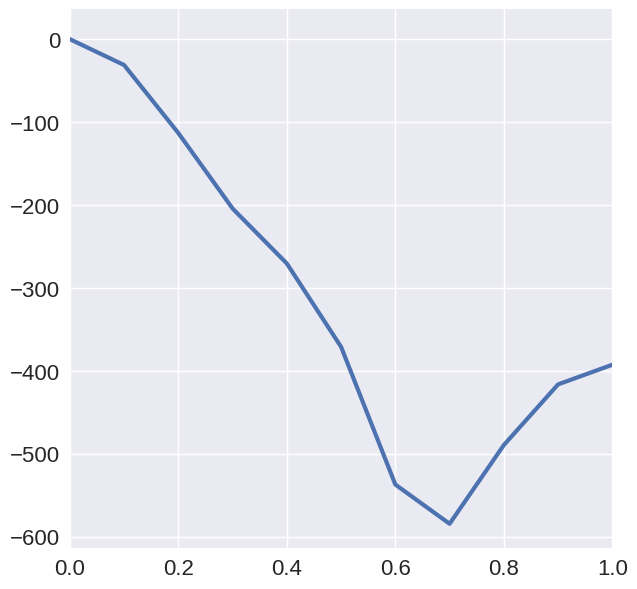

In [58]:
plt.plot(erange, imag(chss[-1][0]['qa1'].TM[:, 0]))

plt.xlim(0, 1)

## Plots

In [56]:
%matplotlib inline

In [ ]:
i1 = 3
i2 = 4

(-10000.0, 10000.0)

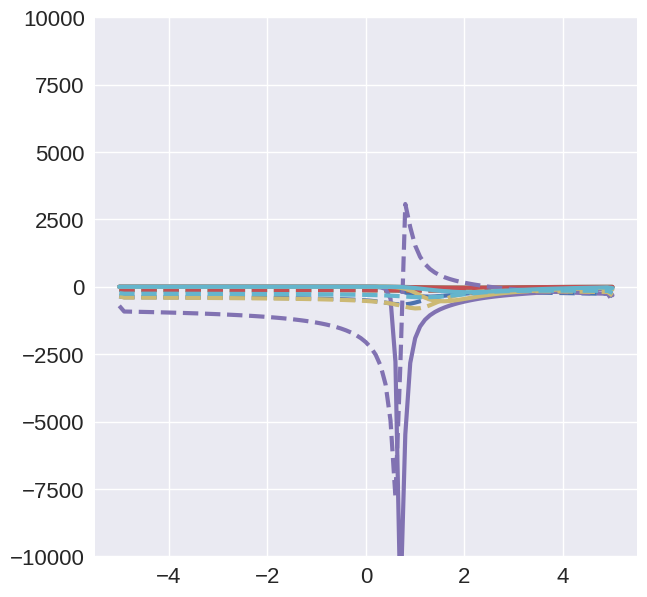

In [33]:
for k, ch in chss[i1][1].items():
    l, = plt.plot(erange, imag(ch.TM[:, 0]), label=k)
    l, = plt.plot(erange, real(ch.TM[:, 0]), label=k, ls='--', c=l.get_c())
    
plt.ylim(-10000, 10000)

(-1.0, 4.0)

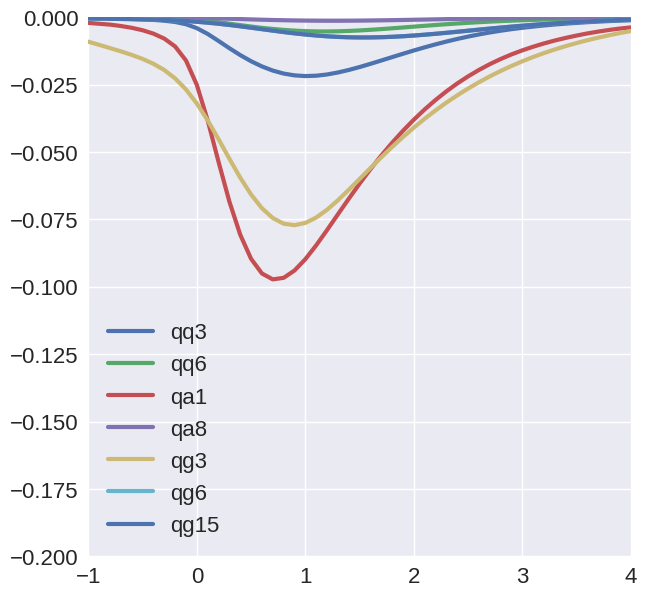

In [34]:
for k, ch in chss[i1][0].items():
    plt.plot(erange, ch.ImS[:, 0], label=k)
    
# for k, ch in chss[i1][1].items():
#     plt.plot(erange, ch.ImS[:, 0], label=k)
    
plt.legend()

plt.ylim(-0.2, 0)
plt.xlim(-1, 4)

(-1.0, 4.0)

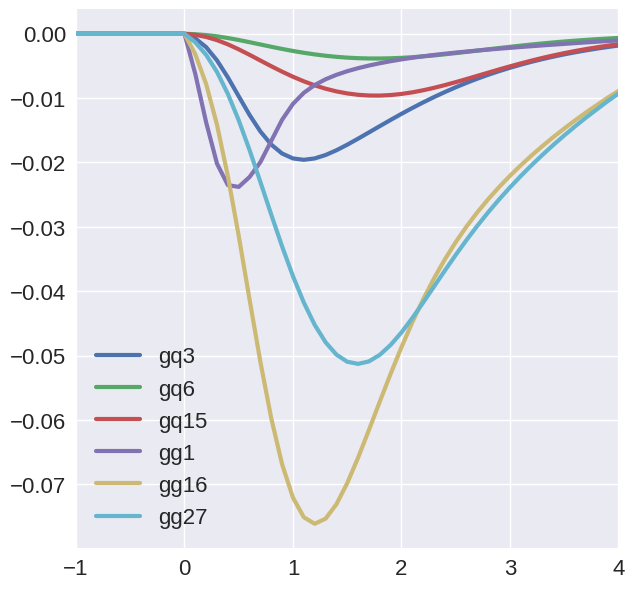

In [35]:
for k, ch in chss[i1][1].items():
    plt.plot(erange, ch.da*ch.ImS[:, 0]/16, label=k)
    
plt.legend()

# plt.ylim(-0.5, 0)
plt.xlim(-1, 4)

In [44]:
i_plot = [1, 3, 5, 7]

lss = ['-', '--', ':', '-.']

In [45]:
G1 = pts[i1][1]
G2 = pts[i2][1]

In [53]:
import matplotlib
matplotlib.style.use('publication23')

0.999997683858965
1.0000008894573762
0.999999031714707
0.9999501778263687


(0.0, 4.0)

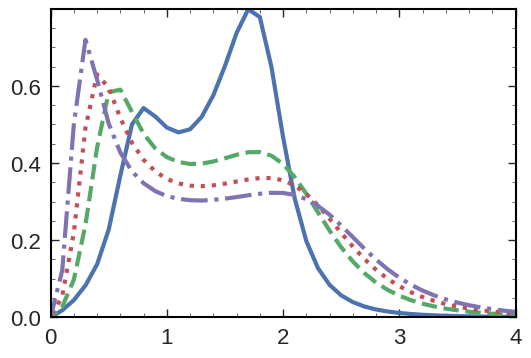

In [54]:
for i, ls in zip(i_plot, lss):
    G = pts[i][1]
    plt.plot(erange, G.Rtab[:, 0], ls=ls)
    print(trapz(G.Rtab[:, 0], x=erange))
plt.xlim(0, 4)

0.9999618732601588
0.9998596145523657
0.999901034730077
1.0003569568701565


(-1.0, 4.0)

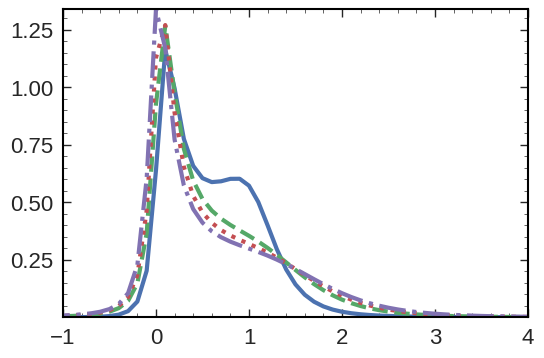

In [55]:
for i, ls in zip(i_plot, lss):
    G = pts[i][0]
    plt.plot(erange, G.Rtab[:, 0], ls=ls)
    print(trapz(G.Rtab[:, 0], x=erange))
plt.xlim(-1, 4)

(-1.0, 4.0)

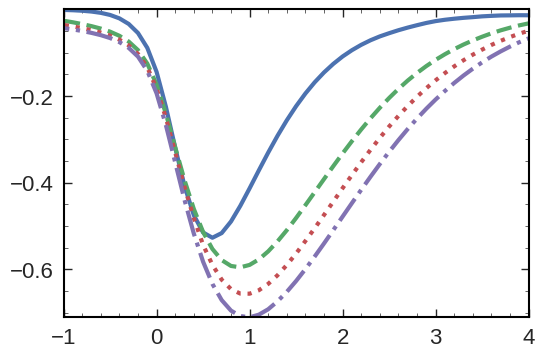

In [59]:
for i, ls in zip(i_plot, lss):
    G = pts[i][0]
    plt.plot(erange, imag(G.S[:, 0]), ls=ls)
#     print(trapz(G.Rtab[:, 0], x=erange))
    
plt.xlim(-1, 4)

(-1.0, 4.0)

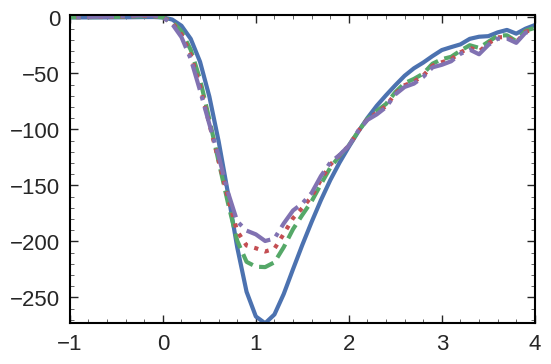

In [60]:
for i, ls in zip(i_plot, lss):
    G = pts[i][0]
    ch = chss[i][0]['qa1']
    plt.plot(erange, imag(ch.TM[:, 0]), ls=ls)
#     print(trapz(G.Rtab[:, 0], x=erange))
plt.xlim(-1, 4)

(-1.0, 4.0)

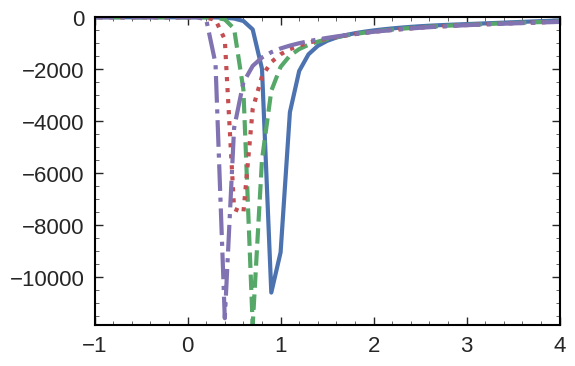

In [61]:
for i, ls in zip(i_plot, lss):
    G = pts[i][0]
    ch = chss[i][1]['gg1']
    plt.plot(erange, imag(ch.TM[:, 0]), ls=ls)
#     print(trapz(G.Rtab[:, 0], x=erange))
plt.xlim(-1, 4)

In [64]:
pickle.dump(chss, open(out_folder + "chss_T=%.3f.p"%T, "wb" ) )

In [66]:
pickle.dump(pts, open(out_folder + "pts_T=%.3f.p"%T, "wb" ) )

### Plot the iteration steps

## Test qg and gq 

In [ ]:
ch_gg = Channel(gluon_run, gluon_run, T, ds=4, da=1, Fa=9/4, **params)


In [42]:
ch_gg.populate_T()

  0%|          | 0/201 [00:00<?, ?it/s]

In [49]:
%matplotlib inline

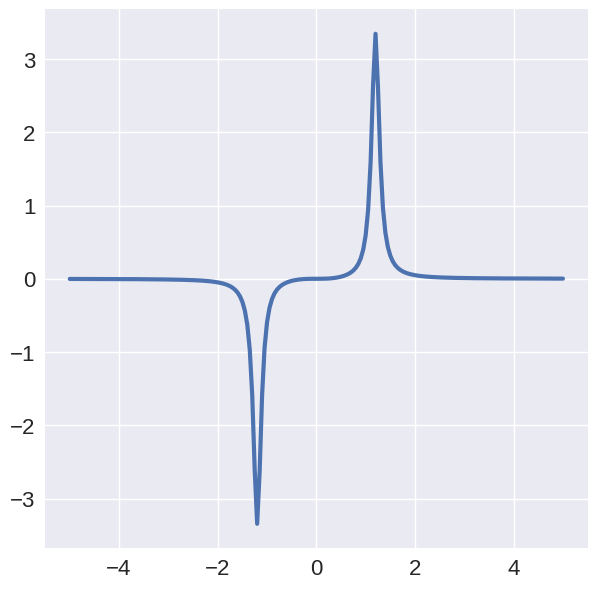

In [53]:
plt.plot(erange, gluon_run.Rtab[:, 0])

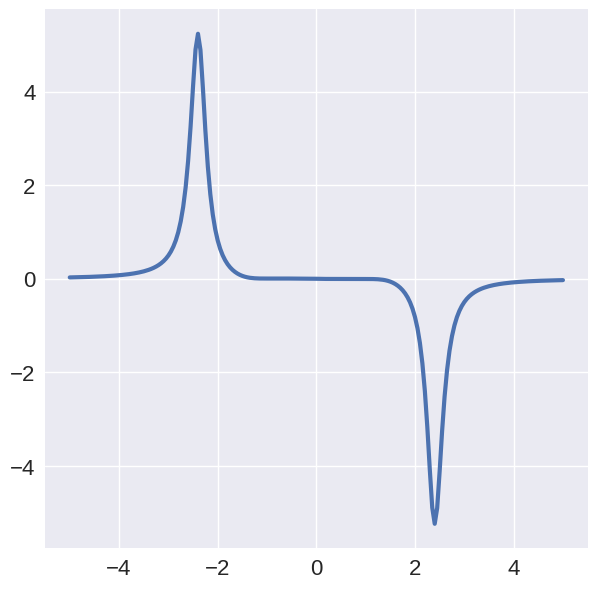

In [52]:
plt.plot(erange, ch_gg.ImG2[:, 0])

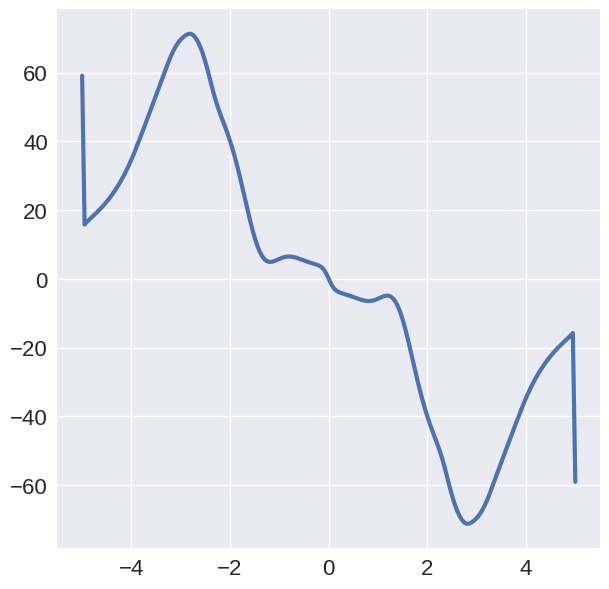

In [51]:
plt.plot(erange, imag(ch_gg.TM[:, 0]))

In [15]:
Q, G = pts[-1]

IndexError: list index out of range

In [27]:
chss[0]

[{'qa1': <QuarkTM.Channel at 0x7f049c8fe790>,
  'qg3': <QuarkTM.Channel at 0x7f04c0174590>},
 {'gq3': <QuarkTM.Channel at 0x7f049ce2f190>,
  'gg1': <QuarkTM.Channel at 0x7f049c8a9090>}]

In [28]:
plt.plot(erange, chss[0][1]['gg1'].TM[:, 0])

/usr/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [24]:
i = 3

ch_qa1 = chss[i][0]['qa1']
pt_q = pts[i+1][0]

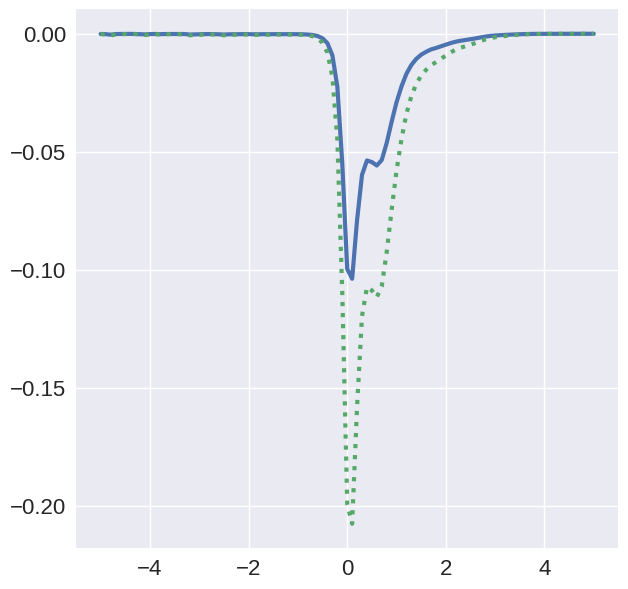

In [25]:
plt.plot(erange, ch_qa1.ImS[:, 0])
plt.plot(erange, imag(pt_q.S[:, 0]), ls=':')

0.9997331925175041

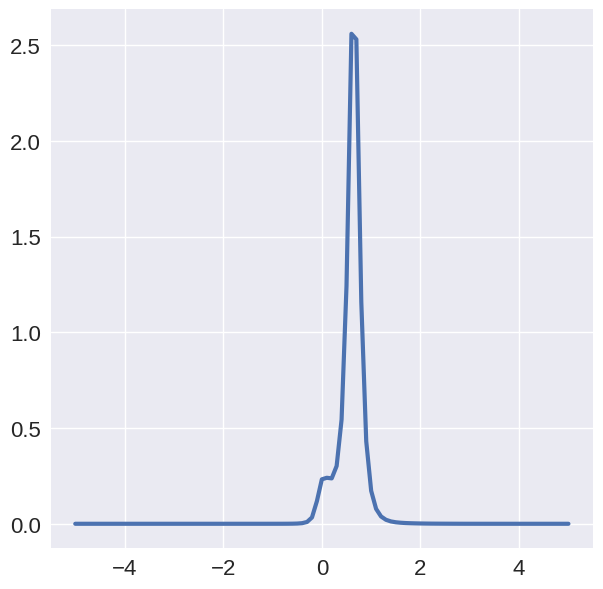

In [26]:
plt.plot(erange, pt_q.Rtab[:, 0])
trapz(pt_q.Rtab[:, 0], x=erange)

(0.0, 2.0)

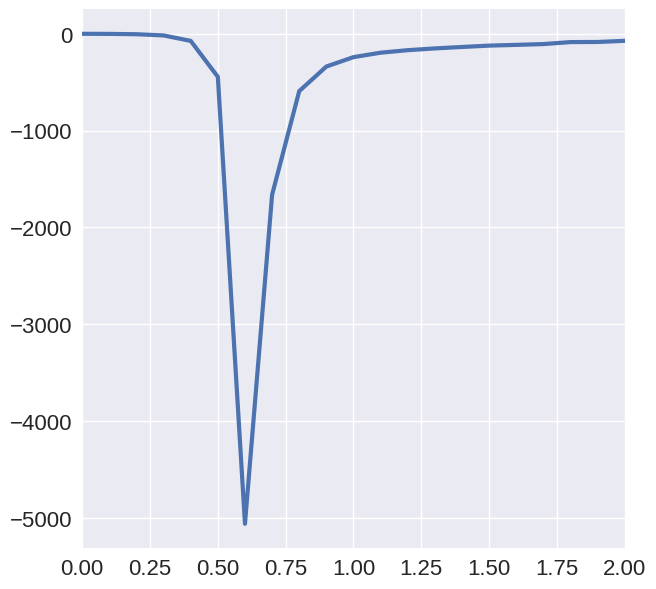

In [27]:
plt.plot(erange, imag(ch_qa1.TM[:, 0]))
plt.xlim(0, 2)

In [20]:
quark_bup.Rtab[:, 0] / quark_run.Rtab[:, 0]

array([0.95217879, 0.98484   , 0.99659466, 0.99583314, 0.9755638 ,
       0.97227193, 0.950351  , 1.05760321, 1.12971382, 1.1311207 ,
       1.09573843, 0.97030169, 0.99520245, 0.99284775, 1.07585312,
       1.06802734, 1.03013955, 1.01071431, 1.012092  , 1.01243406,
       1.02671705, 1.07206752, 1.03645784, 1.0474132 , 1.06052731,
       1.06057533, 1.0665812 , 1.10925638, 1.09772126, 1.05547169,
       1.06218646, 1.0565312 , 1.06303099, 1.09831755, 1.10139888,
       1.09017057, 1.09291488, 1.08261883, 1.06299492, 1.05017757,
       1.01540053, 0.96730983, 0.92512561, 0.90224029, 0.89585137,
       0.90296743, 0.91963354, 0.94617888, 0.98462128, 1.00363909,
       0.9823693 , 0.96168333, 0.96863603, 1.00842931, 1.05206191,
       1.04726921, 0.97899522, 0.96946767, 0.99868485, 1.02391145,
       1.03836033, 1.03978828, 1.04027961, 1.03471813, 1.02698254,
       1.01971756, 1.01416196, 1.00768531, 1.00217668, 0.99795747,
       0.99582604, 0.99938298, 1.0071481 , 1.01096104, 1.01284

In [28]:
quark_bup.Rtab[:, 0] - quark_run.Rtab[:, 0] 

array([-3.63663465e-07, -7.33049007e-07, -1.17967412e-06, -2.47966634e-06,
       -4.85546407e-08, -7.66546290e-08, -1.34283991e-07, -8.49012858e-08,
       -1.31931313e-07, -3.05500631e-07, -2.96423088e-07, -4.22548726e-07,
       -9.21355909e-07, -1.26947089e-06, -1.17454089e-07, -1.57600971e-07,
       -1.25883713e-06, -2.69089401e-06, -4.86984721e-06, -1.95471221e-06,
       -1.91028377e-06, -9.17402465e-07, -1.83781859e-06, -1.18889138e-06,
       -2.05364635e-06, -2.25333555e-06, -2.20216925e-06, -4.33304536e-06,
       -1.58059838e-06, -3.25150886e-06, -2.77826246e-06, -2.31577702e-06,
       -5.17561085e-06, -1.32508726e-06, -7.17242391e-07, -1.57201628e-07,
       -1.46308140e-06, -2.62924101e-06, -1.78485169e-06, -2.18146267e-06,
       -1.06515547e-06, -3.01525154e-06, -2.61711004e-06, -2.46878138e-06,
       -1.90329429e-06, -1.63155706e-06, -3.54163194e-06, -3.49106926e-06,
       -3.93023846e-06, -2.03304818e-06, -1.89265039e-06, -3.44637300e-06,
       -2.97831815e-06, -